# Importing Libraries

In [70]:
import numpy as np # Version '1.26.4'
import pandas as pd # Version '2.2.2'
import matplotlib # Version '3.9.0'
from matplotlib import pyplot as plt 
import seaborn as sns # Version '0.13.2'

print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.9.0
Seaborn 0.13.2


# Loading Dataset

In [31]:
df = pd.read_csv('../data/modelling_data.csv')
df[:5]

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Data Preprocessing

In [32]:
X = df.iloc[:, :-1]
y = df['Purchased']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('encoding', OneHotEncoder())
])

num_cols = list(X_train.select_dtypes(['int', 'float']))
cat_cols = list(X_train.select_dtypes(['object'])
)
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [35]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Model Building

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
from sklearn.model_selection import cross_val_predict

model = cross_val_predict(knn, X_train, y_train, cv=10)

In [51]:
from sklearn.metrics import accuracy_score, jaccard_score

accuracy_score(y_train, model), jaccard_score(y_train, model)

(0.896875, 0.7659574468085106)

In [58]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_neighbors': np.arange(1,26)
}

model_gs = GridSearchCV(knn, grid_param, scoring='jaccard', cv=10)
model_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])},
             scoring='jaccard')

In [59]:
model_gs.best_params_

{'n_neighbors': 5}

In [80]:
model_gs.best_score_.round(2)

0.77

In [64]:
model_gs.cv_results_['rank_test_score']

array([22, 25, 14, 18,  1, 17, 12,  6,  2,  3,  4,  5, 10,  9, 13,  7,  7,
       11, 15, 16, 19, 20, 21, 24, 23])

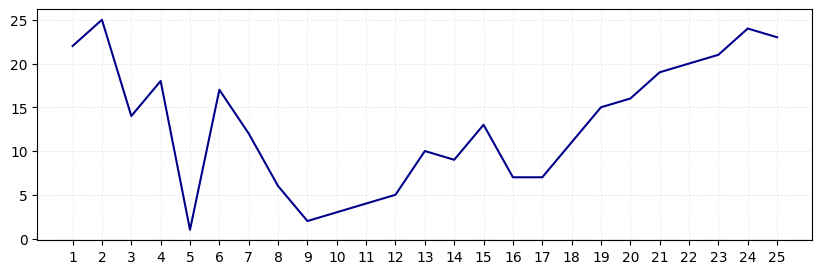

In [78]:
plt.figure(figsize=(10,3))
sns.lineplot(x=grid_param['n_neighbors'], y=model_gs.cv_results_['rank_test_score'], color='darkblue')
plt.xticks(grid_param['n_neighbors'])
plt.grid(linewidth=.5, color='grey', axis='both', linestyle='--', alpha=.2)
plt.show()

In [81]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

In [82]:
y_pred_gs = model_gs.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.95

# Model Export

In [89]:
import joblib

joblib.dump(knn, '../models/knn_model.joblib')
joblib.dump(model_gs, '../models/gs_model_knn.joblib')
joblib.dump(preprocessor, '../models/preprocessor.joblib')

['../models/preprocessor.joblib']